# Import libraries and load data

Importing libraries and verifying the use of GPU.

In [12]:
%tensorflow_version 2.x
import numpy as np
import tensorflow as tf
import keras
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import regularizers
from keras import optimizers

print("Tensorflow version %s" %tf.__version__)

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Tensorflow version 2.4.0
Found GPU at: /device:GPU:0


Loading data from Keras. 
The dataset used is CIFAR10 dataset.

In [13]:
def get_cifar10():
    #num_classes = 10
    batch_size = 128
    input_shape = (1024,)

    # load data 
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
    ninput = x_train.shape[0]
    imgsize = (x_train.shape[1], x_train.shape[2])
    ntest = x_test.shape[0]
    # take the first 6 or 3 classes
    num_classes2 = 3
    if num_classes2 == 6:
      a=(y_train==0)
      x_1=x_train[list(a[:,0])]
      a=(y_train==1)
      x_2=x_train[list(a[:,0])]
      a=(y_train==2)
      x_3=x_train[list(a[:,0])]
      a=(y_train==3)
      x_4=x_train[list(a[:,0])]
      a=(y_train==4)
      x_5=x_train[list(a[:,0])]
      a=(y_train==5)
      x_6=x_train[list(a[:,0])]
      x_12=np.append(x_1,x_2,axis=0)
      x_123=np.append(x_12,x_3,axis=0)
      x_1234=np.append(x_123,x_4,axis=0)
      x_12345=np.append(x_1234,x_5,axis=0)
      x_123456=np.append(x_12345,x_6,axis=0)
      x_train = x_123456

      a=(y_test==0)
      x_1=x_test[list(a[:,0])]
      a=(y_test==1)
      x_2=x_test[list(a[:,0])]
      a=(y_test==2)
      x_3=x_test[list(a[:,0])]
      a=(y_test==3)
      x_4=x_test[list(a[:,0])]
      a=(y_test==4)
      x_5=x_test[list(a[:,0])]
      a=(y_test==5)
      x_6=x_test[list(a[:,0])]
      x_12=np.append(x_1,x_2,axis=0)
      x_123=np.append(x_12,x_3,axis=0)
      x_1234=np.append(x_123,x_4,axis=0)
      x_12345=np.append(x_1234,x_5,axis=0)
      x_123456=np.append(x_12345,x_6,axis=0)
      x_test = x_123456

      y_train = np.zeros((30000,6))
      for i in range(5000):
        y_train[i,0]=1
      for i in range(5000,10000):
        y_train[i,1]=1
      for i in range(10000,15000):
        y_train[i,2]=1
      for i in range(15000,20000):
        y_train[i,3]=1
      for i in range(20000,25000):
        y_train[i,4]=1
      for i in range(25000,30000):
        y_train[i,5]=1

      y_test = np.zeros((6000,6))
      for i in range(1000):
        y_test[i,0]=1
      for i in range(1000,2000):
        y_test[i,1]=1
      for i in range(2000,3000):
        y_test[i,2]=1
      for i in range(3000,4000):
        y_test[i,3]=1
      for i in range(4000,5000):
        y_test[i,4]=1
      for i in range(5000,6000):
        y_test[i,5]=1

    elif num_classes2 == 3:
      a=(y_train==0)
      x_1=x_train[list(a[:,0])]
      a=(y_train==1)
      x_2=x_train[list(a[:,0])]
      a=(y_train==2)
      x_3=x_train[list(a[:,0])]
      x_12=np.append(x_1,x_2,axis=0)
      x_123=np.append(x_12,x_3,axis=0)
      x_train = x_123

      a=(y_test==0)
      x_1=x_test[list(a[:,0])]
      a=(y_test==1)
      x_2=x_test[list(a[:,0])]
      a=(y_test==2)
      x_3=x_test[list(a[:,0])]
      x_12=np.append(x_1,x_2,axis=0)
      x_123=np.append(x_12,x_3,axis=0)
      x_test = x_123

      y_train = np.zeros((15000,3))
      for i in range(5000):
        y_train[i,0]=1
      for i in range(5000,10000):
        y_train[i,1]=1
      for i in range(10000,15000):
        y_train[i,2]=1

      y_test = np.zeros((3000,3))
      for i in range(1000):
        y_test[i,0]=1
      for i in range(1000,2000):
        y_test[i,1]=1
      for i in range(2000,3000):
        y_test[i,2]=1
    
    else: 
      print("Select number of classes in num_classes2 variable")

    print('x_train shape: %s'%str(x_train.shape))
    print('y_train shape: %s'%str(y_train.shape))


    input_shape = (x_train.shape[1], x_train.shape[2], 3)
    # normalize input to [0,1]
    x_train = x_train / 255.0
    x_test = x_test / 255.0
    print("x_test shape %s" %str(x_test.shape))
    print("y_test shape %s" %str(y_test.shape))
    print("Input shape: %s" %str(input_shape))
    print("Number of classes: %d" %num_classes2)
    
    # reshape input in 4D array
    x_train = x_train.reshape(x_train.shape[0],32,32,3)
    x_test = x_test.reshape(x_test.shape[0],32,32,3)
    
    # Transform output to one-out-of-n encoding
    #y_train = keras.utils.to_categorical(y_train, num_classes2)
    #y_test = keras.utils.to_categorical(y_test, num_classes2)
    
    return [x_train,y_train,x_test,y_test,input_shape,num_classes2]

[x_train,y_train,x_test,y_test,input_shape,num_classes2] = get_cifar10()

x_train shape: (15000, 32, 32, 3)
y_train shape: (15000, 3)
x_test shape (3000, 32, 32, 3)
y_test shape (3000, 3)
Input shape: (32, 32, 3)
Number of classes: 3


Plotting first 20 images

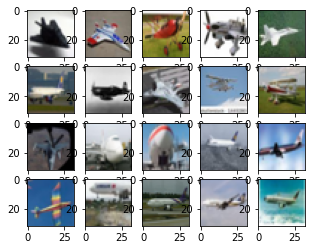

In [ ]:
# plotting first 20 images
fig = plt.figure(figsize=(5,5))

for i in range(20):
    ax = fig.add_subplot(5, 5, i+1)
    ax.imshow(x_train[i], cmap = plt.cm.bone)
plt.show()

Flattening each data in a vector. 
3072 =  32 x 32 x 3

In [19]:
x_train_flatten = x_train.reshape((x_train.shape[0], x_train.shape[1] * x_train.shape[2] * x_train.shape[3]))
x_test_flatten = x_test.reshape((x_test.shape[0], x_test.shape[1] * x_test.shape[2] * x_test.shape[3]))

print("The flatten shape of training data is (%s, %s)" % (x_train_flatten.shape[0], x_train_flatten.shape[1]))
print("The flatten shape of testing data is (%s, %s)" % (x_test_flatten.shape[0], x_test_flatten.shape[1]))

The flatten shape of training data is (15000, 3072)
The flatten shape of testing data is (3000, 3072)


# PCA (10 CLASSES DATASET)

Scatter plot of first 3 components of PCA reduction: very confusing (because 10 classes is too much)


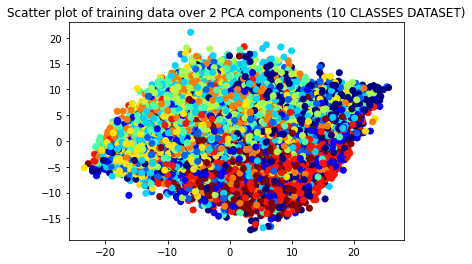

In [ ]:
# number of components for the PCA projection
num_components = 2

# execute PCA
pca = PCA(n_components = num_components)
x_train_pca = pca.fit_transform(x_train_flatten)

y_train_plot = np.argmax(y_train,axis=1)
y_test_plot = np.argmax(y_test,axis=1)

if num_components == 2:
  plt.figure()
  plt.title("Scatter plot of training data over 2 PCA components (10 CLASSES DATASET)")
  plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train_plot, cmap='jet')

elif num_components == 3:
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = Axes3D(fig)
  plt.title("Scatter plot of training data over 3 PCA components (10 CLASSES DATASET)")
  ax.scatter(x_train_pca[:,0], x_train_pca[:,1], x_train_pca[:,2], c=y_train_plot, cmap='jet')
  plt.show()


Finding the number of components that better express the "variance" of the data.

- n_components found = 658

In [ ]:
pca = PCA()
pca.fit_transform(x_train_flatten)
print("initial variance: %s" %str(pca.explained_variance_.shape))

# Calculating optimal j  to have 95% (say) variance 
#  j = number of components for the best PCA projection

j = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.99):
    current_sum += pca.explained_variance_[j]
    j += 1
print("95/100 of variance: %d" %j)

# execute PCA
pca = PCA( n_components = j) 
x_train_pca = pca.fit_transform(x_train_flatten)
x_test_pca = pca.transform(x_test_flatten)
print("The shape of pca training data is (%s, %s)" % (x_train_pca.shape[0], x_train_pca.shape[1]))

initial variance: (3072,)
95/100 of variance: 658
The shape of pca training data is (50000, 658)


## Evaluating performance with PCA reduction (10 CLASSES DATASET)

First prediction: using KNN

In [ ]:
# training data 
# n_neighbors = 300 chosen because 300 ≃ sqrt(number of training samples)
model_knn = KNeighborsClassifier(n_neighbors=300)
model_knn.fit(x_train_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=300, p=2,
                     weights='uniform')

In [ ]:
# predicting data
y_pred_knn = model_knn.predict(x_test_pca)
knn_score = accuracy_score(y_test, y_pred_knn)
print("Accuracy obtained with KNN with 658 features extracted from PCA: %s" %knn_score)


Accuracy obtained with KNN with 658 features extracted from PCA: 0.0699


# PCA (6 CLASSES)

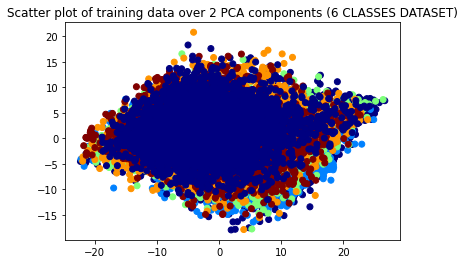

In [ ]:
# number of components for the PCA projection
num_components = 2

# execute PCA
pca = PCA(n_components = num_components)
x_train_pca = pca.fit_transform(x_train_flatten)

y_train_plot = np.argmax(y_train,axis=1)
y_test_plot = np.argmax(y_test,axis=1)

if num_components == 2:
  plt.figure()
  plt.title("Scatter plot of training data over 2 PCA components (6 CLASSES DATASET)")
  plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train_plot, cmap='jet')

elif num_components == 3:
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = Axes3D(fig)
  plt.title("Scatter plot of training data over 3 PCA components (6 CLASSES DATASET)")
  ax.scatter(x_train_pca[:,0], x_train_pca[:,1], x_train_pca[:,2], c=y_train_plot, cmap='jet')
  plt.show()


In [ ]:
pca = PCA()
pca.fit_transform(x_train_flatten)
print("initial variance: %s" %str(pca.explained_variance_.shape))

# Calculating optimal k to have 95% (say) variance 
#  j = number of components for the best PCA projection

j = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.99):
    current_sum += pca.explained_variance_[j]
    j += 1
print("95/100 of variance: %d" %j)

# execute PCA
pca = PCA( n_components = j) 
x_train_pca = pca.fit_transform(x_train_flatten)
x_test_pca = pca.transform(x_test_flatten)
print("The shape of pca training data is (%s, %s)" % (x_train_pca.shape[0], x_train_pca.shape[1]))

initial variance: (3072,)
95/100 of variance: 631
The shape of pca training data is (30000, 631)


## Evaluating performance with PCA reduction (6 CLASSES DATASET)

In [ ]:
# training data 
# n_neighbors = 200 chosen because 200 ≃ sqrt(number of training samples)
model_knn = KNeighborsClassifier(n_neighbors=200)
model_knn.fit(x_train_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=200, p=2,
                     weights='uniform')

In [ ]:
# predicting data
y_pred_knn = model_knn.predict(x_test_pca)
knn_score = accuracy_score(y_test, y_pred_knn)
print("Accuracy obtained with KNN with 631 features extracted from PCA: %s" %knn_score)

Accuracy obtained with KNN with 631 features extracted from PCA: 0.16283333333333333


# PCA (3 CLASSES)

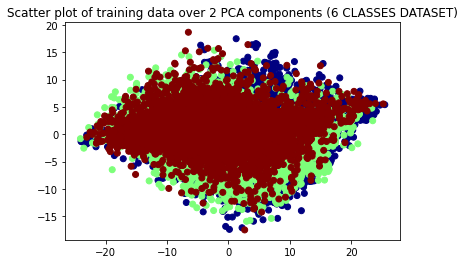

In [ ]:
# number of components for the PCA projection
num_components = 2

# execute PCA
pca = PCA(n_components = num_components)
x_train_pca = pca.fit_transform(x_train_flatten)

y_train_plot = np.argmax(y_train,axis=1)
y_test_plot = np.argmax(y_test,axis=1)

if num_components == 2:
  plt.figure()
  plt.title("Scatter plot of training data over 2 PCA components (3 CLASSES DATASET)")
  plt.scatter(x_train_pca[:,0], x_train_pca[:,1], c=y_train_plot, cmap='jet')

elif num_components == 3:
  from mpl_toolkits.mplot3d import Axes3D
  fig = plt.figure()
  ax = Axes3D(fig)
  plt.title("Scatter plot of training data over 3 PCA components (3 CLASSES DATASET)")
  ax.scatter(x_train_pca[:,0], x_train_pca[:,1], x_train_pca[:,2], c=y_train_plot, cmap='jet')
  plt.show()

In [ ]:
pca = PCA()
pca.fit_transform(x_train_flatten)
print("initial variance: %s" %str(pca.explained_variance_.shape))

# Calculating optimal k to have 95% (say) variance 
#  j = number of components for the best PCA projection

j = 0
total = sum(pca.explained_variance_)
current_sum = 0

while(current_sum / total < 0.99):
    current_sum += pca.explained_variance_[j]
    j += 1
print("95/100 of variance: %d" %j)

# execute PCA
pca = PCA( n_components = j) 
x_train_pca = pca.fit_transform(x_train_flatten)
x_test_pca = pca.transform(x_test_flatten)
print("The shape of pca training data is (%s, %s)" % (x_train_pca.shape[0], x_train_pca.shape[1]))

initial variance: (3072,)
95/100 of variance: 633
The shape of pca training data is (15000, 633)


In [ ]:
# training data 
# n_neighbors = 130 chosen because 130 ≃ sqrt(number of training samples)
model_knn = KNeighborsClassifier(n_neighbors=130)
model_knn.fit(x_train_pca,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=130, p=2,
                     weights='uniform')

In [ ]:
# predicting data
y_pred_knn = model_knn.predict(x_test_pca)
knn_score = accuracy_score(y_test, y_pred_knn)
print("Accuracy obtained with KNN with 631 features extracted from PCA: %s" %knn_score)

Accuracy obtained with KNN with 631 features extracted from PCA: 0.546


# Simple Autoencoder

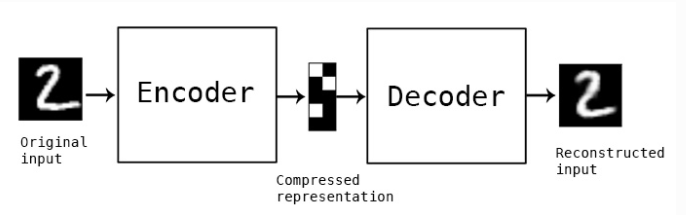

Very simple autoencoder: 2 dense layer (encoded - decoded)

In [ ]:
def SimpleAutoencoder(input_shape,output_shape):

    autoencoder_model = Sequential()

    autoencoder_model.add(BatchNormalization(input_shape=input_shape))
    autoencoder_model.add(Dropout(0.2))
    autoencoder_model.add(Dense(633, activation='relu', name="dense1"))

    autoencoder_model.add(BatchNormalization())
    autoencoder_model.add(Dropout(0.2))
    autoencoder_model.add(Dense(output_shape, activation='relu'))

    optimizer = 'adam'
    autoencoder_model.compile(loss=keras.losses.mean_squared_error, optimizer=optimizer)

    return autoencoder_model

# creating the model
i_shape = x_train_flatten.shape[1:]
o_shape = x_train_flatten.shape[1]

autoencoder_model = SimpleAutoencoder(i_shape, o_shape)
autoencoder_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_32 (Batc (None, 3072)              12288     
_________________________________________________________________
dropout_32 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense1 (Dense)               (None, 633)               1945209   
_________________________________________________________________
batch_normalization_33 (Batc (None, 633)               2532      
_________________________________________________________________
dropout_33 (Dropout)         (None, 633)               0         
_________________________________________________________________
dense_28 (Dense)             (None, 3072)              1947648   
Total params: 3,907,677
Trainable params: 3,900,267
Non-trainable params: 7,410
________________________________________

In [ ]:
epochs = 30
history = autoencoder_model.fit(x_train_flatten, x_train_flatten, batch_size=100, epochs=epochs, validation_data=(x_test_flatten, x_test_flatten), 
                      verbose=1)


Epoch 1/30
150/150 [==============================] - 1s 6ms/step - loss: 0.0103 - val_loss: 0.0065
Epoch 2/30
150/150 [==============================] - 1s 5ms/step - loss: 0.0100 - val_loss: 0.0069
Epoch 3/30
150/150 [==============================] - 1s 5ms/step - loss: 0.0097 - val_loss: 0.0054
Epoch 4/30
150/150 [==============================] - 1s 5ms/step - loss: 0.0092 - val_loss: 0.0058
Epoch 5/30
150/150 [==============================] - 1s 5ms/step - loss: 0.0093 - val_loss: 0.0056
Epoch 6/30
150/150 [==============================] - 1s 5ms/step - loss: 0.0088 - val_loss: 0.0050
Epoch 7/30
150/150 [==============================] - 1s 5ms/step - loss: 0.0086 - val_loss: 0.0052
Epoch 8/30
150/150 [==============================] - 1s 5ms/step - loss: 0.0084 - val_loss: 0.0051
Epoch 9/30
150/150 [==============================] - 1s 5ms/step - loss: 0.0083 - val_loss: 0.0048
Epoch 10/30
150/150 [==============================] - 1s 5ms/step - loss: 0.0084 - val_loss: 0.0049

Simple Autoencoder reconstraction.

Text(0.5, 1.0, 'Simple Autoencoder reconstruction')

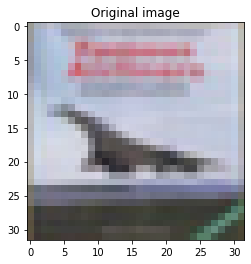

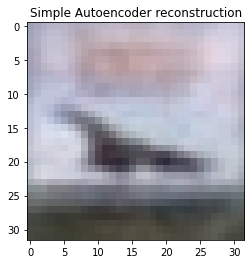

In [ ]:
# show the encoder-decoder reconstruction
idx = 0

# original image
img_plot = np.array(x_test_flatten[idx, :], dtype="float")
img_plot = img_plot.reshape((32,32,3))
plt.figure()
plt.imshow(img_plot, cmap='gray')
plt.title("Original image")

x_test_flatten_pred = autoencoder_model.predict(x_test_flatten)

img_plot = np.array(x_test_flatten_pred[idx,:], dtype="float")
img_plot = img_plot.reshape((32,32,3))
plt.figure()
plt.imshow(img_plot, cmap='gray')
plt.title("Simple Autoencoder reconstruction")

Now I want to consider only the encoder structure in mine simple autoencoder and see if the reduction in 2D made by the (simple) encoder is better than the reduction in 2D made by PCA.
To do this I will:
- extracting the encoder part from the silmple autoencoder
- plot training data over the encoder components 
- It is better the reduced representation of PCA or of the simple autoencoder?

In [ ]:
from keras.models import Model

# this function is taken from the exercise of ML course number 15.
def layer_extractor(model, layer_name):
    
    # define the input tensor
    original_input = model.get_layer(index=0).input

    # define the output tensor
    output_layer = model.get_layer(name=layer_name).output
    
    # compile the model
    extractor = Model(inputs=original_input, outputs=output_layer)
    optimizer = 'adam' 
    extractor.compile(loss=keras.losses.mean_squared_error, optimizer=optimizer)

    return extractor

# dense3 is the bottleneck layer (you can extract the output from any layer)
layer_extracted = "dense1"
simple_encoder = layer_extractor(autoencoder_model, layer_extracted)

In [ ]:
# predict the training data to check if the encoder is better than PCA
encoder_model_predictions = simple_encoder.predict(x_train_flatten)

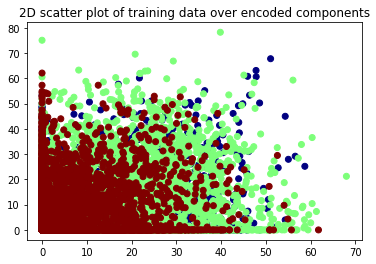

In [ ]:
n_components = 2

if n_components == 2:
  plt.figure()
  plt.title("2D scatter plot of training data over encoded components")
  plt.scatter(encoder_model_predictions[:,0], encoder_model_predictions[:,1], c=y_train_plot, cmap='jet')


## Evaluating performance with encoder reduction (with KNN)



In [ ]:
# train the model using the encoder predictions (samples x features) training sets
knn_model = KNeighborsClassifier(n_neighbors=130)
knn_model.fit(encoder_model_predictions, y_train_plot)

test_encoder_features =  simple_encoder.predict(x_test_flatten)
knn_pred_encoder = knn_model.predict(test_encoder_features)

accuracy_knn_encoder = accuracy_score(y_test_plot, knn_pred_encoder)
print("Accuracy obtained with KNN + 631 features extracted from Simple Autoencoder: %s" %accuracy_knn_encoder)


Accuracy obtained with KNN + 631 features extracted from Simple Autoencoder: 0.6503333333333333


# Deep Autoencoder (6 CLASSES)

In [5]:
def DeepAutoencoder(input_shape,output_shape):

    deepautoencoder_model = Sequential()

    deepautoencoder_model.add(BatchNormalization(input_shape=input_shape))
    deepautoencoder_model.add(Dropout(0.2))
    deepautoencoder_model.add(Dense(1500, activation='relu'))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.2))
    deepautoencoder_model.add(Dense(1000, activation='relu'))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.2))
    deepautoencoder_model.add(Dense(600, activation='relu'))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.2))
    deepautoencoder_model.add(Dense(300, activation='relu',name="dense10"))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.2))
    deepautoencoder_model.add(Dense(800, activation='relu'))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.3))
    deepautoencoder_model.add(Dense(1200, activation='relu'))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.3))
    deepautoencoder_model.add(Dense(1700, activation='relu'))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.2))
    deepautoencoder_model.add(Dense(output_shape, activation='relu'))

    optimizer = 'adam'
    deepautoencoder_model.compile(loss=keras.losses.mean_squared_error, optimizer=optimizer, metrics=['accuracy'])

    return deepautoencoder_model

# creating the model
i_shape = x_train_flatten.shape[1:]
o_shape = x_train_flatten.shape[1]

deepautoencoder_model = DeepAutoencoder(i_shape, o_shape)
deepautoencoder_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
dropout (Dropout)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1500)              4609500   
_________________________________________________________________
batch_normalization_1 (Batch (None, 1500)              6000      
_________________________________________________________________
dropout_1 (Dropout)          (None, 1500)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1501000   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1000)              4

In [6]:
epochs = 30
history = deepautoencoder_model.fit(x_train_flatten, x_train_flatten, batch_size=256, epochs=epochs, validation_data=(x_test_flatten, x_test_flatten), 
                      verbose=1)

Epoch 1/30
118/118 [==============================] - 6s 23ms/step - loss: 0.1355 - accuracy: 6.5081e-04 - val_loss: 0.0811 - val_accuracy: 0.0010
Epoch 2/30
118/118 [==============================] - 2s 17ms/step - loss: 0.0471 - accuracy: 0.0016 - val_loss: 0.0484 - val_accuracy: 8.3333e-04
Epoch 3/30
118/118 [==============================] - 2s 17ms/step - loss: 0.0375 - accuracy: 0.0013 - val_loss: 0.0326 - val_accuracy: 3.3333e-04
Epoch 4/30
118/118 [==============================] - 2s 18ms/step - loss: 0.0433 - accuracy: 6.9322e-04 - val_loss: 0.0389 - val_accuracy: 8.3333e-04
Epoch 5/30
118/118 [==============================] - 2s 18ms/step - loss: 0.0408 - accuracy: 0.0017 - val_loss: 0.0476 - val_accuracy: 0.0015
Epoch 6/30
118/118 [==============================] - 2s 17ms/step - loss: 0.0411 - accuracy: 4.7673e-04 - val_loss: 0.2119 - val_accuracy: 0.0015
Epoch 7/30
118/118 [==============================] - 2s 17ms/step - loss: 0.0401 - accuracy: 0.0016 - val_loss: 0.035

In [8]:
from keras.models import Model

def layer_extractor(model, layer_name):
    
    # define the input tensor
    original_input = model.get_layer(index=0).input

    # define the output tensor
    output_layer = model.get_layer(name=layer_name).output
    
    # compile the model
    extractor = Model(inputs=original_input, outputs=output_layer)
    optimizer = 'adam' #alternative 'SGD'
    extractor.compile(loss=keras.losses.mean_squared_error, optimizer=optimizer)

    return extractor

# dense3 is the bottleneck layer (you can extract the output from any layer)
layer = "dense10"
deep_encoder = layer_extractor(deepautoencoder_model, layer)

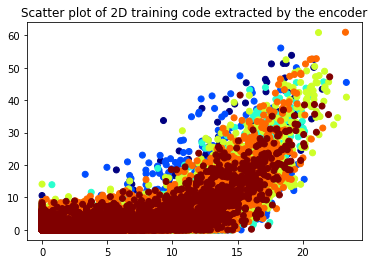

In [10]:
# predict the training data to check if the encoder is better than PCA
encoder_predictions = deep_encoder.predict(x_train_flatten)
y_train_plot = np.argmax(y_train,axis=1)
y_test_plot = np.argmax(y_test,axis=1)
plt.figure()
plt.title("Scatter plot of 2D training code extracted by the encoder")
plt.scatter(encoder_predictions[:,0], encoder_predictions[:,1], c=y_train_plot, cmap='jet')

## Evaluating performance with deep encoder reduction (with KNN) 

In [11]:
# train the model using the encoder predictions (samples x features) training sets
knn_model2 = KNeighborsClassifier(n_neighbors=200)
knn_model2.fit(encoder_predictions, y_train_plot)

test_encoder_features =  deep_encoder.predict(x_test_flatten)
knn_pred_encoder = knn_model2.predict(test_encoder_features)

accuracy_knn_encoder = accuracy_score(y_test_plot, knn_pred_encoder)
print("Accuracy obtained with KNN + 631 features extracted from Deep Autoencoder: %s" %accuracy_knn_encoder)


Accuracy obtained with KNN + 631 features extracted from Deep Autoencoder: 0.43266666666666664


# Deep Autoencoder (3 CLASSES)

In [32]:
def DeepAutoencoder(input_shape,output_shape):

    deepautoencoder_model = Sequential()

    deepautoencoder_model.add(BatchNormalization(input_shape=input_shape))
    deepautoencoder_model.add(Dropout(0.2))
    deepautoencoder_model.add(Dense(2000, activation='relu'))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.2))
    deepautoencoder_model.add(Dense(1500, activation='relu'))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.2))
    deepautoencoder_model.add(Dense(800, activation='relu'))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.2))
    deepautoencoder_model.add(Dense(633, activation='relu',name="dense10"))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.2))
    deepautoencoder_model.add(Dense(1000, activation='relu'))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.3))
    deepautoencoder_model.add(Dense(1900, activation='relu'))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.3))
    deepautoencoder_model.add(Dense(2300, activation='relu'))

    deepautoencoder_model.add(BatchNormalization())
    deepautoencoder_model.add(Dropout(0.2))
    deepautoencoder_model.add(Dense(output_shape, activation='relu'))

    optimizer = 'adam'
    deepautoencoder_model.compile(loss=keras.losses.mean_squared_error, optimizer=optimizer)

    return deepautoencoder_model

# creating the model
i_shape = x_train_flatten.shape[1:]
o_shape = x_train_flatten.shape[1]

deepautoencoder_model = DeepAutoencoder(i_shape, o_shape)
deepautoencoder_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_32 (Batc (None, 3072)              12288     
_________________________________________________________________
dropout_32 (Dropout)         (None, 3072)              0         
_________________________________________________________________
dense_28 (Dense)             (None, 2000)              6146000   
_________________________________________________________________
batch_normalization_33 (Batc (None, 2000)              8000      
_________________________________________________________________
dropout_33 (Dropout)         (None, 2000)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 1500)              3001500   
_________________________________________________________________
batch_normalization_34 (Batc (None, 1500)             

In [33]:
epochs = 30
history = deepautoencoder_model.fit(x_train_flatten, x_train_flatten, batch_size=100, epochs=epochs, validation_data=(x_test_flatten, x_test_flatten), 
                      verbose=1)

Epoch 1/30
150/150 [==============================] - 4s 14ms/step - loss: 0.1692 - val_loss: 0.1155
Epoch 2/30
150/150 [==============================] - 2s 12ms/step - loss: 0.0532 - val_loss: 0.0579
Epoch 3/30
150/150 [==============================] - 2s 12ms/step - loss: 0.0510 - val_loss: 0.0796
Epoch 4/30
150/150 [==============================] - 2s 12ms/step - loss: 0.0507 - val_loss: 0.0504
Epoch 5/30
150/150 [==============================] - 2s 12ms/step - loss: 0.0463 - val_loss: 0.0587
Epoch 6/30
150/150 [==============================] - 2s 12ms/step - loss: 0.0425 - val_loss: 0.0447
Epoch 7/30
150/150 [==============================] - 2s 13ms/step - loss: 0.0363 - val_loss: 0.0366
Epoch 8/30
150/150 [==============================] - 2s 12ms/step - loss: 0.0336 - val_loss: 0.0328
Epoch 9/30
150/150 [==============================] - 2s 13ms/step - loss: 0.0321 - val_loss: 0.0298
Epoch 10/30
150/150 [==============================] - 2s 12ms/step - loss: 0.0329 - val_lo

In [34]:
from keras.models import Model

def layer_extractor(model, layer_name):
    
    # define the input tensor
    original_input = model.get_layer(index=0).input

    # define the output tensor
    output_layer = model.get_layer(name=layer_name).output
    
    # compile the model
    extractor = Model(inputs=original_input, outputs=output_layer)
    optimizer = 'adam' #alternative 'SGD'
    extractor.compile(loss=keras.losses.mean_squared_error, optimizer=optimizer)

    return extractor

# dense3 is the bottleneck layer (you can extract the output from any layer)
layer = "dense10"
deep_encoder = layer_extractor(deepautoencoder_model, layer)

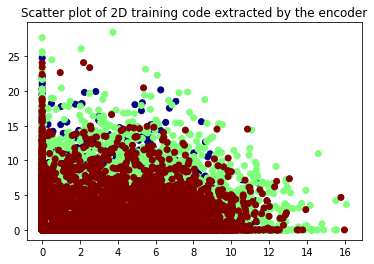

In [35]:
# predict the training data to check if the encoder is better than PCA
encoder_predictions = deep_encoder.predict(x_train_flatten)
y_train_plot = np.argmax(y_train,axis=1)
y_test_plot = np.argmax(y_test,axis=1)
plt.figure()
plt.title("Scatter plot of 2D training code extracted by the encoder")
plt.scatter(encoder_predictions[:,0], encoder_predictions[:,1], c=y_train_plot, cmap='jet')

## Evaluating performance with deep encoder reduction (with KNN)

In [36]:
# train the model using the encoder predictions (samples x features) training sets
knn_model2 = KNeighborsClassifier(n_neighbors=130)
knn_model2.fit(encoder_predictions, y_train_plot)

test_encoder_features =  deep_encoder.predict(x_test_flatten)
knn_pred_encoder = knn_model2.predict(test_encoder_features)

accuracy_knn_encoder = accuracy_score(y_test_plot, knn_pred_encoder)
print("Accuracy obtained with KNN + 633 features extracted from Deep Autoencoder: %s" %accuracy_knn_encoder)


Accuracy obtained with KNN + 633 features extracted from Deep Autoencoder: 0.6973333333333334
